In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url1)
soup = BeautifulSoup(html_data.content, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all('table')
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        relevant_table = table
        break
for row in relevant_table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) > 1: 
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')
        if revenue:
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


In [6]:
import pandas as pd
import yfinance as yf
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
gme = yf.Ticker("GME")
gme_data = tesla.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data1 = requests.get(url2)
soup_gme = BeautifulSoup(html_data1.content, 'html.parser')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables_gme = soup_gme.find_all('table')
for table in tables_gme:
    if "GameStop Quarterly Revenue" in str(table):
        relevant_table_gme = table
        break
for row in relevant_table_gme.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) > 1:  # to ensure it is not the header row
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
print(gme_revenue.head())

         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0


C:\Users\satya\AppData\Local\Temp\ipykernel_2916\1219865114.py:21: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\satya\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\satya\AppData\Local\Temp\ipykernel_2916\1219865114.py:24: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\saty

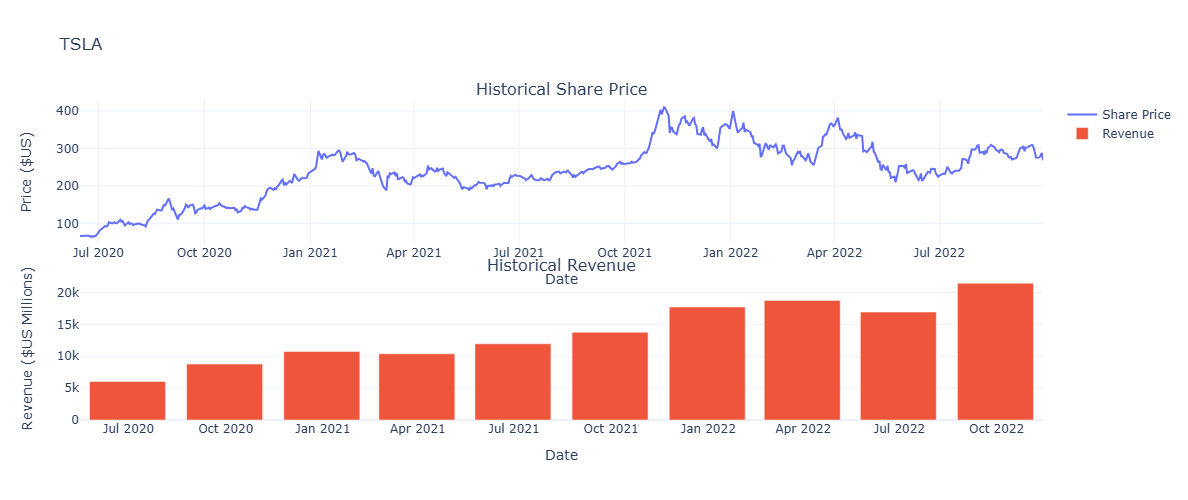

In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd

stock_data = yf.download("TSLA", start="2020-01-01", end="2022-09-30", progress=False)
revenue_data = tesla_revenue
stock_data.reset_index(inplace=True)
#revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=False, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.15)
    
    stock_data_specific = stock_data[stock_data.Date >= '2020-06-14']
    revenue_data_specific = tesla_revenue[tesla_revenue.Date >= '2020-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Bar(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Revenue.astype("float"),
                             name="Revenue"),row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=True,
                      height=500, width=600,
                      title=stock, template='plotly_white')
    fig.show()
make_graph(stock_data, revenue_data, 'TSLA')

C:\Users\satya\AppData\Local\Temp\ipykernel_2916\3221492088.py:21: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\satya\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\satya\AppData\Local\Temp\ipykernel_2916\3221492088.py:24: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\saty

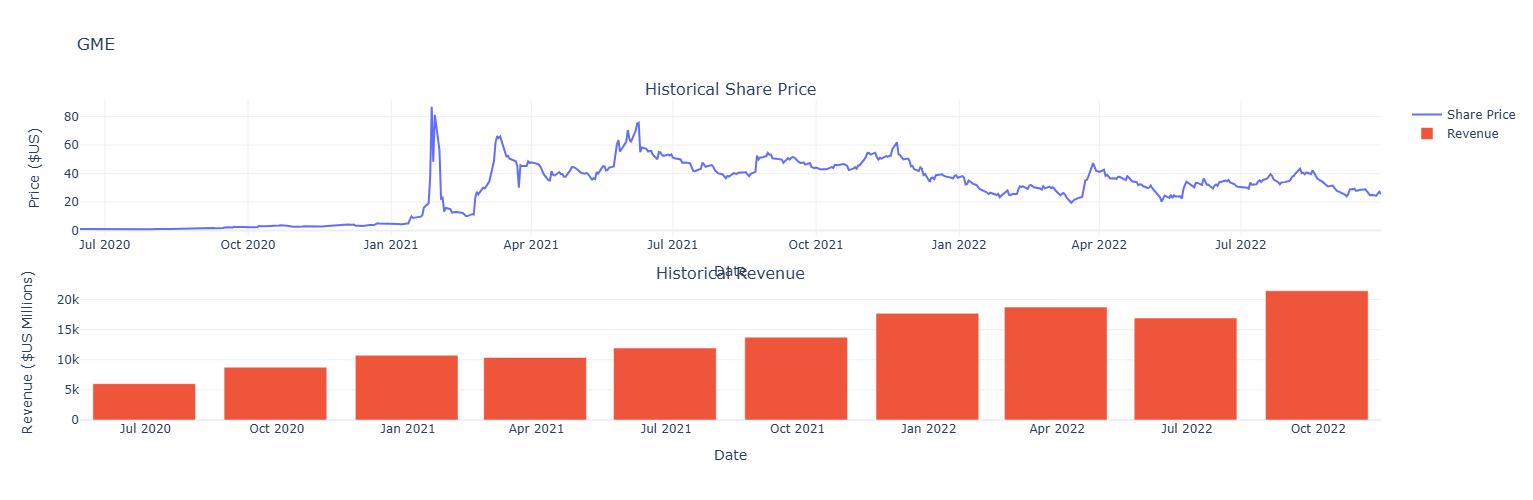

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd

stock_data = yf.download("GME", start="2020-01-01", end="2022-09-30", progress=False)
revenue_data = tesla_revenue
stock_data.reset_index(inplace=True)
#revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=False, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.15)
    
    stock_data_specific = stock_data[stock_data.Date >= '2020-06-14']
    revenue_data_specific = tesla_revenue[tesla_revenue.Date >= '2020-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Bar(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Revenue.astype("float"),
                             name="Revenue"),row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=True,
                      height=500, width=600,
                      title=stock, template='plotly_white')
    fig.show()
make_graph(stock_data, revenue_data, 'GME')